In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Constantes del sistema
L_AA = 366e-6     # H
J = 5e-9          # kg.m^2
R_A = 55.6        # Ohm
B = 0             # N.m.s
K_i = 6.49e-3     # V.s/rad
K_m = 6.53e-3     # N.m/A

# Parámetros de simulación
dt = 1e-7         # Paso de integración (s)
t_final = 0.1       # Tiempo total de simulación (s)
n = int(t_final / dt)  # Cantidad de pasos

In [16]:
# Variables de estado
ia = np.zeros(n)
omega = np.zeros(n)
theta = np.zeros(n)
t = np.linspace(0, t_final, n)

# Entrada de voltaje y torque de carga
va = 12           # V
TL = 0            # N.m

In [17]:
# Integración de Euler
for k in range(n-1):
    dia = (-R_A * ia[k] - K_m * omega[k] + va) / L_AA
    domega = (K_i * ia[k] - B * omega[k] - TL) / J
    dtheta = omega[k]

    ia[k+1] = ia[k] + dt * dia
    omega[k+1] = omega[k] + dt * domega
    theta[k+1] = theta[k] + dt * dtheta

# Resultados
ia_max = np.max(ia)
omega_max = np.max(omega)
print(f"Corriente máxima: {ia_max:.3f} A")
print(f"Velocidad angular máxima: {omega_max:.3f} rad/s")

Corriente máxima: 0.215 A
Velocidad angular máxima: 1837.672 rad/s


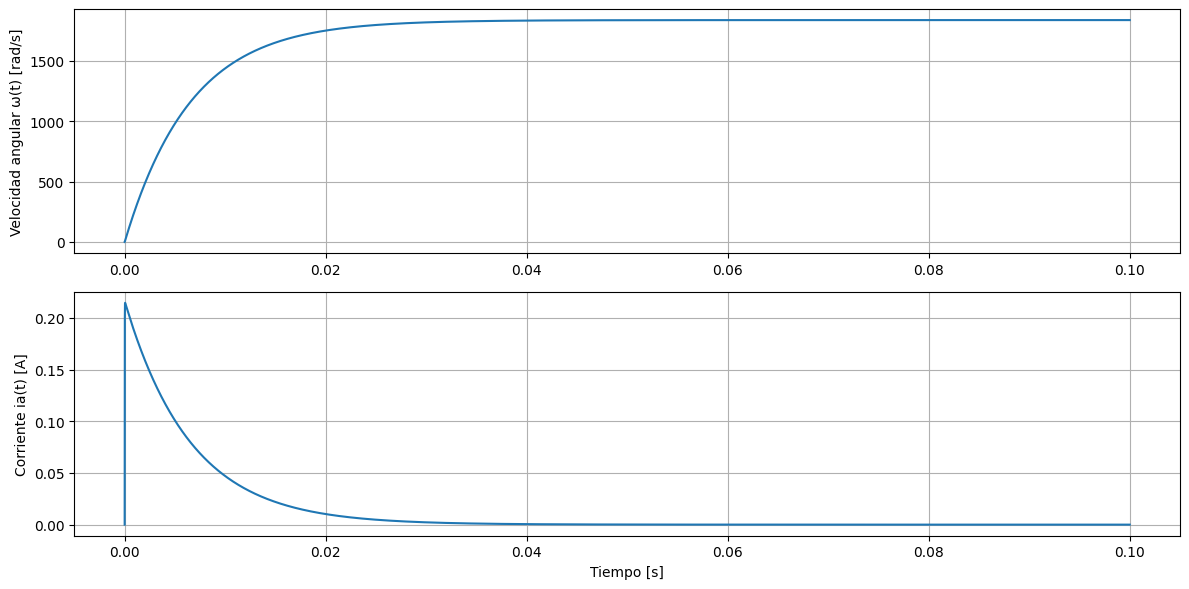

In [18]:
# Gráficos
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, omega)
plt.ylabel('Velocidad angular ω(t) [rad/s]')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, ia)
plt.ylabel('Corriente ia(t) [A]')
plt.xlabel('Tiempo [s]')
plt.grid(True)
plt.tight_layout()
plt.show()


Corriente máxima: 0.215 A
Velocidad angular máxima: 1837.672 rad/s


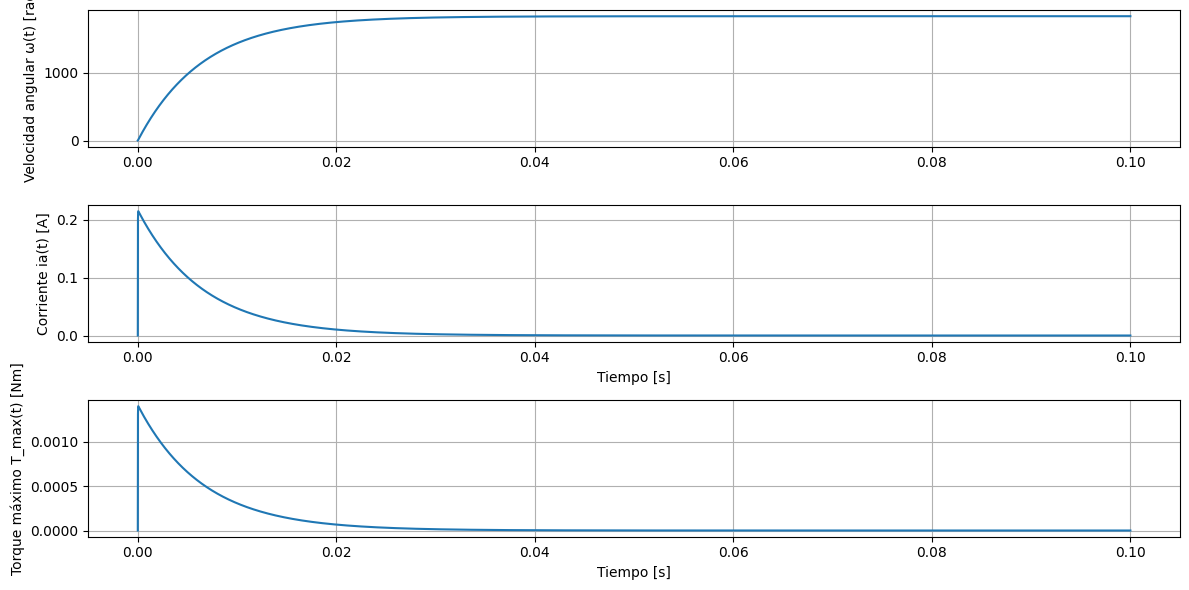

In [21]:
# Calcular el torque máximo a partir de la corriente
T_max = K_m * ia  # Torque máximo en cada instante

# Resultados
ia_max = np.max(ia)
omega_max = np.max(omega)
print(f"Corriente máxima: {ia_max:.3f} A")
print(f"Velocidad angular máxima: {omega_max:.3f} rad/s")

# Graficar resultados
plt.figure(figsize=(12, 6))

# Graficar Velocidad Angular
plt.subplot(3, 1, 1)
plt.plot(t, omega)
plt.ylabel('Velocidad angular ω(t) [rad/s]')
plt.grid(True)

# Graficar Corriente de Armadura
plt.subplot(3, 1, 2)
plt.plot(t, ia)
plt.ylabel('Corriente ia(t) [A]')
plt.xlabel('Tiempo [s]')
plt.grid(True)

# Graficar Torque máximo
plt.subplot(3, 1, 3)
plt.plot(t, T_max)
plt.ylabel('Torque máximo T_max(t) [Nm]')
plt.xlabel('Tiempo [s]')
plt.grid(True)

plt.tight_layout()
plt.show()


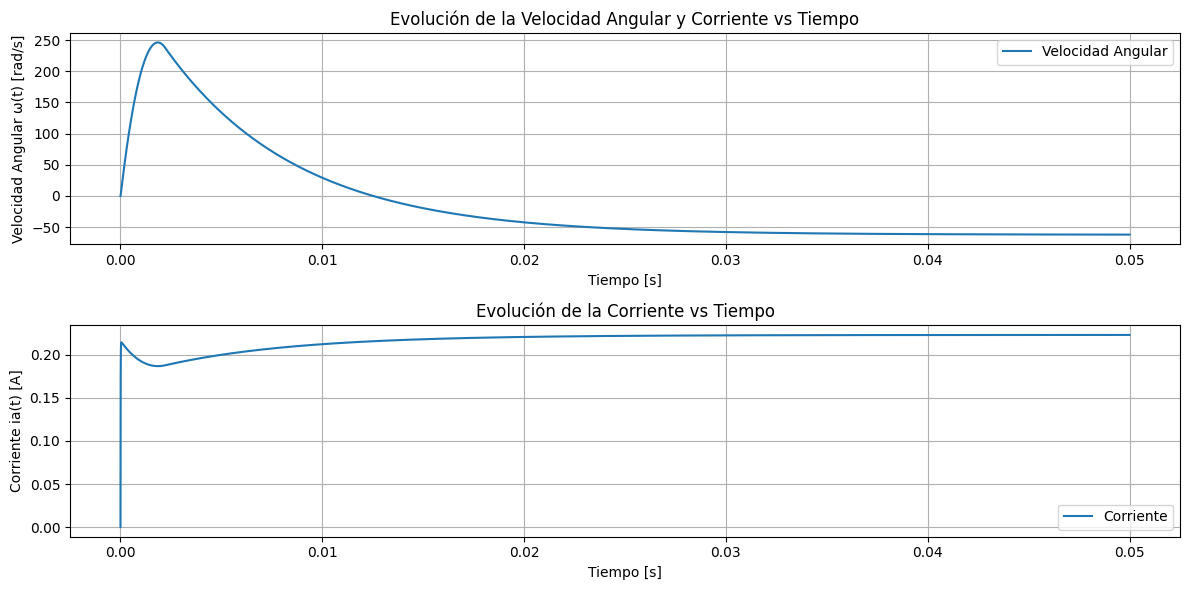

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Función del motor (modmotor)
def modmotor(t_etapa, xant, accion, TL):
    Laa = 366e-6  # Inductancia (H)
    J = 5e-9     # Momento de inercia (kg.m^2)
    Ra = 55.6    # Resistencia (Ohm)
    B = 0        # Coeficiente de fricción (N.m.s)
    Ki = 6.49e-3 # Constante de retroalimentación de voltaje (V.s/rad)
    Km = 6.53e-3 # Constante de retroalimentación de torque (N.m/A)

    Va = accion
    h = 1e-7
    omega = xant[0]
    wp = xant[1]
    ia = xant[2]

    for ii in range(int(t_etapa / h)):
        # Ecuación del sistema: dinámicas del motor
        wpp = (-wp * (Ra * J + Laa * B) - omega * (Ra * B + Ki * Km) + Va * Ki) / (J * Laa)
        wp = wp + h * wpp
        wp = wp - ((1 / J) * (TL))  # Apliqué el torque de carga directamente en la ecuación
        iap = (-Ra * ia - Km * omega + Va) / Laa
        ia = ia + iap * h
        omega = omega + h * wp

    return np.array([omega, wp, ia])

# Parámetros de simulación
t_etapa = 1e-7
tF = 0.05  # Tiempo total de simulación
delta_TL = 1e-9  # Incremento de torque
TL_max = 2.2e-5  # Torque máximo
n = int(tF / t_etapa)  # Cantidad de pasos
t = np.linspace(0, tF, n)

# Inicialización de las variables
omega = np.zeros(n)
ia = np.zeros(n)
TL = 0  # Inicializamos el torque en 0
X = np.zeros(3)

# Almacenamos los resultados para cada incremento de torque
omega_vals = []
ia_vals = []
TL_vals = []

# Simulación: incrementar torque progresivamente y registrar los resultados
for k in range(n - 1):
    # Guardamos los resultados actuales para graficarlos después
    omega_vals.append(omega[k])
    ia_vals.append(ia[k])
    TL_vals.append(TL)

    # Simulamos el motor con el torque actual
    X = modmotor(t_etapa, X, 12, TL)  # 12 V de voltaje
    omega[k + 1] = X[0]
    ia[k + 1] = X[2]

    # Aumentamos el torque para el siguiente paso
    TL = min(TL + delta_TL, TL_max)  # Aumenta el torque, pero no pasa el máximo

# Al agregar los últimos valores de omega e ia
omega_vals.append(omega[-1])
ia_vals.append(ia[-1])
TL_vals.append(TL)

# Graficamos la evolución de la corriente y la velocidad angular
plt.figure(figsize=(12, 6))

# Gráfico 1: Velocidad Angular vs Tiempo
plt.subplot(2, 1, 1)
plt.plot(t, omega_vals, label="Velocidad Angular")
plt.title("Evolución de la Velocidad Angular y Corriente vs Tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Velocidad Angular ω(t) [rad/s]")
plt.grid(True)
plt.legend()

# Gráfico 2: Corriente vs Tiempo
plt.subplot(2, 1, 2)
plt.plot(t, ia_vals, label="Corriente")
plt.title("Evolución de la Corriente vs Tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Corriente ia(t) [A]")
plt.grid(True)
plt.legend()

# Ajustes gráficos
plt.tight_layout()
plt.show()


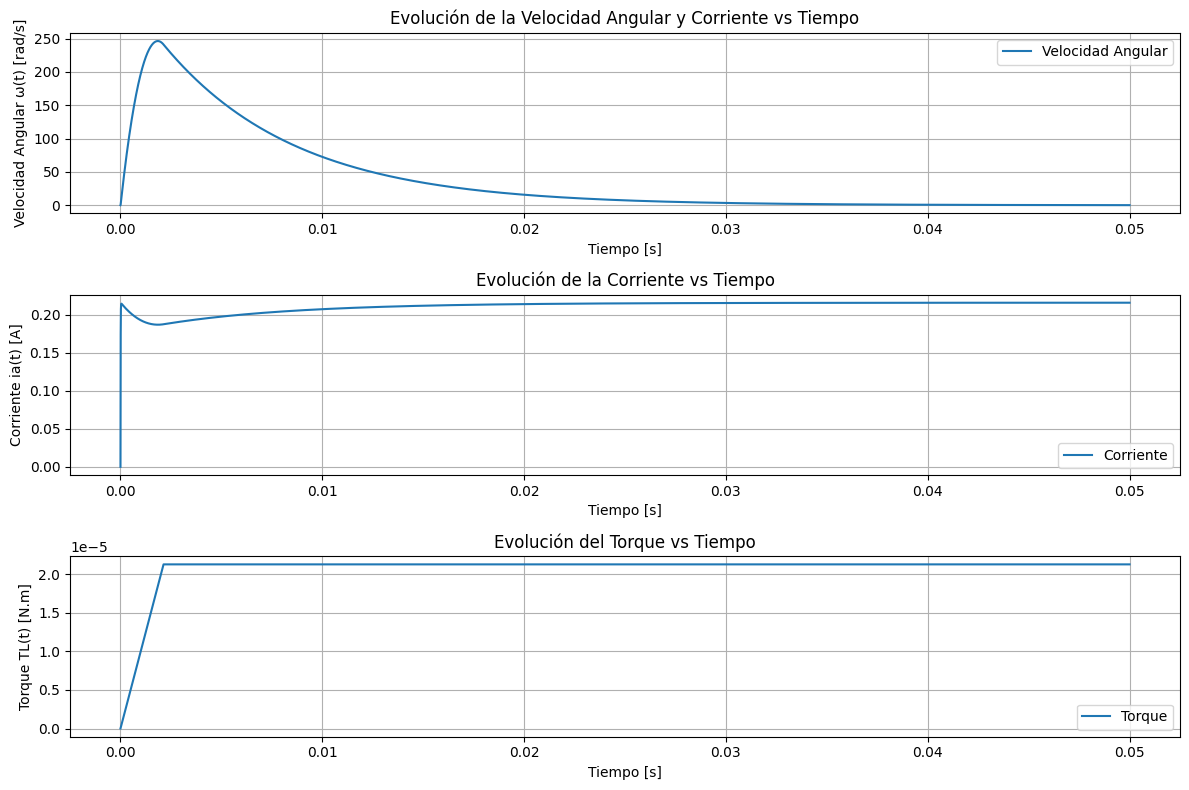

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Función del motor (modmotor)
def modmotor(t_etapa, xant, accion, TL):
    Laa = 366e-6  # Inductancia (H)
    J = 5e-9     # Momento de inercia (kg.m^2)
    Ra = 55.6    # Resistencia (Ohm)
    B = 0        # Coeficiente de fricción (N.m.s)
    Ki = 6.49e-3 # Constante de retroalimentación de voltaje (V.s/rad)
    Km = 6.53e-3 # Constante de retroalimentación de torque (N.m/A)

    Va = accion
    h = 1e-7
    omega = xant[0]
    wp = xant[1]
    ia = xant[2]

    for ii in range(int(t_etapa / h)):
        # Ecuación del sistema: dinámicas del motor
        wpp = (-wp * (Ra * J + Laa * B) - omega * (Ra * B + Ki * Km) + Va * Ki) / (J * Laa)
        wp = wp + h * wpp
        wp = wp - ((1 / J) * (TL))  # Apliqué el torque de carga directamente en la ecuación
        iap = (-Ra * ia - Km * omega + Va) / Laa
        ia = ia + iap * h
        omega = omega + h * wp

    return np.array([omega, wp, ia])

# Parámetros de simulación
t_etapa = 1e-7
tF = 0.05  # Tiempo total de simulación
delta_TL = 1e-9  # Incremento de torque
TL_max = 2.128e-5  # Torque máximo
n = int(tF / t_etapa)  # Cantidad de pasos
t = np.linspace(0, tF, n)

# Inicialización de las variables
omega = np.zeros(n)
ia = np.zeros(n)
TL = 0  # Inicializamos el torque en 0
X = np.zeros(3)

# Almacenamos los resultados para cada incremento de torque
omega_vals = []
ia_vals = []
TL_vals = []

# Simulación: incrementar torque progresivamente y registrar los resultados
for k in range(n - 1):
    # Guardamos los resultados actuales para graficarlos después
    omega_vals.append(omega[k])
    ia_vals.append(ia[k])
    TL_vals.append(TL)

    # Simulamos el motor con el torque actual
    X = modmotor(t_etapa, X, 12, TL)  # 12 V de voltaje
    omega[k + 1] = X[0]
    ia[k + 1] = X[2]

    # Aumentamos el torque para el siguiente paso
    TL = min(TL + delta_TL, TL_max)  # Aumenta el torque, pero no pasa el máximo

# Al agregar los últimos valores de omega e ia
omega_vals.append(omega[-1])
ia_vals.append(ia[-1])
TL_vals.append(TL)

# Graficamos la evolución de la corriente, la velocidad angular y el torque
plt.figure(figsize=(12, 8))

# Gráfico 1: Velocidad Angular vs Tiempo
plt.subplot(3, 1, 1)
plt.plot(t, omega_vals, label="Velocidad Angular")
plt.title("Evolución de la Velocidad Angular y Corriente vs Tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Velocidad Angular ω(t) [rad/s]")
plt.grid(True)
plt.legend()

# Gráfico 2: Corriente vs Tiempo
plt.subplot(3, 1, 2)
plt.plot(t, ia_vals, label="Corriente")
plt.title("Evolución de la Corriente vs Tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Corriente ia(t) [A]")
plt.grid(True)
plt.legend()

# Gráfico 3: Torque vs Tiempo
plt.subplot(3, 1, 3)
plt.plot(t, TL_vals, label="Torque")
plt.title("Evolución del Torque vs Tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Torque TL(t) [N.m]")
plt.grid(True)
plt.legend()

# Ajustes gráficos
plt.tight_layout()
plt.show()


In [ ]:
TL_max = 2.128e-5  # Torque máximo para el grafico de arriba, que da velocidad angular 0, corriente maxima.